##### Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

##### Because of the changes in the Attribute, the following steps mentioned in the assignment are NA

Treat “diagnosis” – 2nd Column as your Dependent Variable and Rest of the columns as Independent Variable and split the table.
    - Instead it  will be the last column 'Class'
    
Convert Categorical values("M" and "B") of Dependent Variable -Y into numerical value ("1" and "0") respectively
    - Already the class column has values 2 & 4 instead of Benign and Malignant

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [20]:
bc_df = pd.read_csv('Breast_Cancer_Wisconsin.csv')

In [21]:
bc_df.shape

(699, 11)

In [22]:
bc_df.dtypes

Id                           int64
ClumpThickness               int64
UniformityCellSize           int64
UniformityCell Shape         int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
BlandChromatin               int64
NormalNucleoli               int64
Mitoses                      int64
Class                        int64
dtype: object

In [23]:
# As I have no idea, what the values 1-10 imply for column 'BareNuclei',
# I have removed the rows with missing values, as I felt replacing them with mean/median might not be right.
indexNames = bc_df[ bc_df['BareNuclei'] == '?' ].index

In [25]:
bc_df.drop(indexNames , inplace=True)

In [26]:
bc_df.shape

(683, 11)

In [27]:
bc_df.dtypes

Id                           int64
ClumpThickness               int64
UniformityCellSize           int64
UniformityCell Shape         int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
BlandChromatin               int64
NormalNucleoli               int64
Mitoses                      int64
Class                        int64
dtype: object

In [28]:
bc_df['BareNuclei'] = bc_df.BareNuclei.astype('int64')

In [29]:
bc_df.dtypes

Id                          int64
ClumpThickness              int64
UniformityCellSize          int64
UniformityCell Shape        int64
MarginalAdhesion            int64
SingleEpithelialCellSize    int64
BareNuclei                  int64
BlandChromatin              int64
NormalNucleoli              int64
Mitoses                     int64
Class                       int64
dtype: object

In [30]:
bc_df.describe()

,Id,ClumpThickness,UniformityCellSize,UniformityCell Shape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [33]:
bc_df.groupby(["Class"]).count()

,Id,ClumpThickness,UniformityCellSize,UniformityCell Shape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
Class,,,,,,,,,,
2,444,444,444,444,444,444,444,444,444,444
4,239,239,239,239,239,239,239,239,239,239


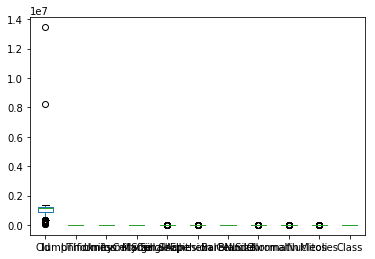

In [32]:
bc_df.plot(kind='box')

In [35]:
bc_df = bc_df.drop(labels = "Id", axis = 1)

In [36]:
bc_df.shape

(683, 10)

In [37]:
# Create a separate dataframe consisting only of the features i.e independent attributes
bc_feature_df = bc_df.drop(labels= "Class" , axis = 1)
bc_feature_df.head()

,ClumpThickness,UniformityCellSize,UniformityCell Shape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [39]:
bc_labels = bc_df["Class"]

In [40]:
bc_labels.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [44]:
bc_feature_df['ClumpThickness'].var() < 0.1

False

In [45]:
bc_feature_df['UniformityCellSize'].var() < 0.1

False

In [46]:
bc_feature_df['UniformityCell Shape'].var() < 0.1

False

In [47]:
bc_feature_df['MarginalAdhesion'].var() < 0.1

False

In [48]:
bc_feature_df['SingleEpithelialCellSize'].var() < 0.1

False

In [49]:
bc_feature_df['BareNuclei'].var() < 0.1

False

In [50]:
bc_feature_df['BlandChromatin'].var() < 0.1

False

In [51]:
bc_feature_df['NormalNucleoli'].var() < 0.1

False

In [52]:
bc_feature_df['Mitoses'].var() < 0.1

False

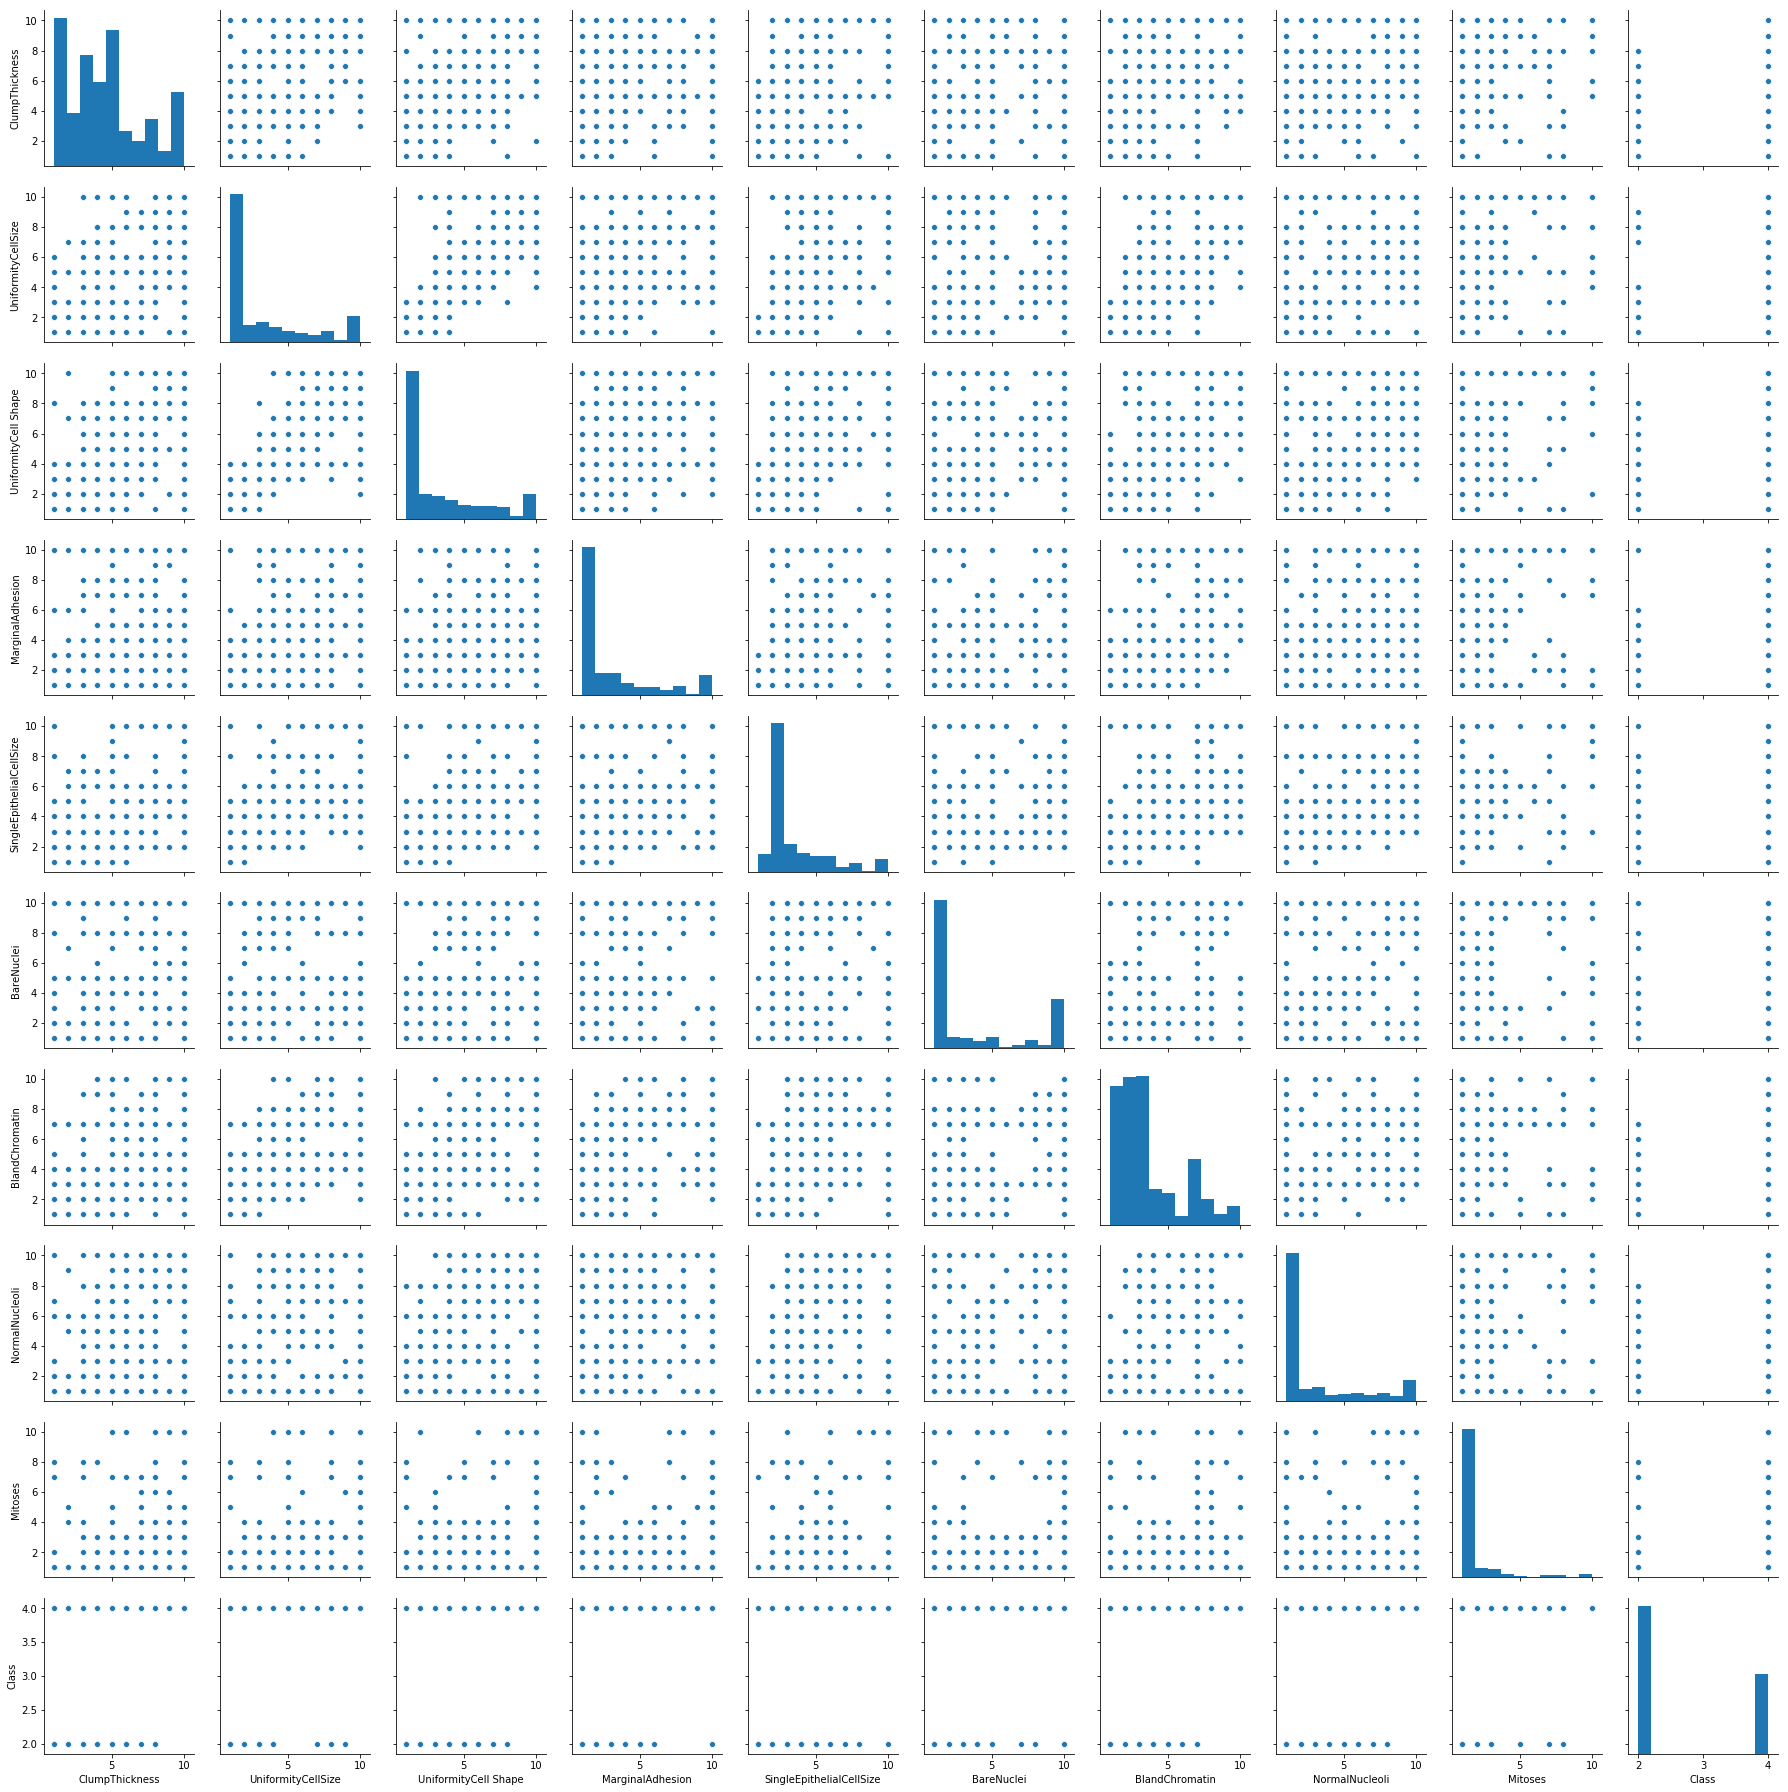

In [53]:
sns.pairplot(bc_df)

In [54]:
bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 
bc_feature_df_z.describe()

,ClumpThickness,UniformityCellSize,UniformityCell Shape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
count,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02
mean,2.813757e-16,-2.899909e-16,-4.431139e-16,2.144047e-16,-5.439768e-16,-1.563415e-15,-2.223697e-16,-7.737425e-17,1.050404e-15
std,1.000733e+00,1.000733e+00,1.000733e+00,1.000733e+00,1.000733e+00,1.000733e+00,1.000733e+00,1.000733e+00,1.000733e+00
min,-1.221191e+00,-7.022120e-01,-7.417736e-01,-6.393655e-01,-1.005763e+00,-6.988531e-01,-9.988531e-01,-6.129274e-01,-3.483997e-01
25%,-8.664174e-01,-7.022120e-01,-7.417736e-01,-6.393655e-01,-5.556085e-01,-6.988531e-01,-5.903401e-01,-6.129274e-01,-3.483997e-01
50%,-1.568693e-01,-7.022120e-01,-7.417736e-01,-6.393655e-01,-5.556085e-01,-6.988531e-01,-1.818272e-01,-6.129274e-01,-3.483997e-01
75%,5.526787e-01,6.037398e-01,5.976352e-01,4.086824e-01,3.447014e-01,6.743249e-01,6.351988e-01,3.705403e-01,-3.483997e-01
max,1.971775e+00,2.236180e+00,2.271896e+00,2.504778e+00,3.045631e+00,1.772867e+00,2.677764e+00,2.337476e+00,4.849690e+00


In [55]:
X = np.array(bc_feature_df_z)
X.shape

(683L, 9L)

In [56]:
y = np.array(bc_labels)
y.shape

(683L,)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 14


In [59]:
NNH = KNeighborsClassifier(n_neighbors= 1)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9414634146341463

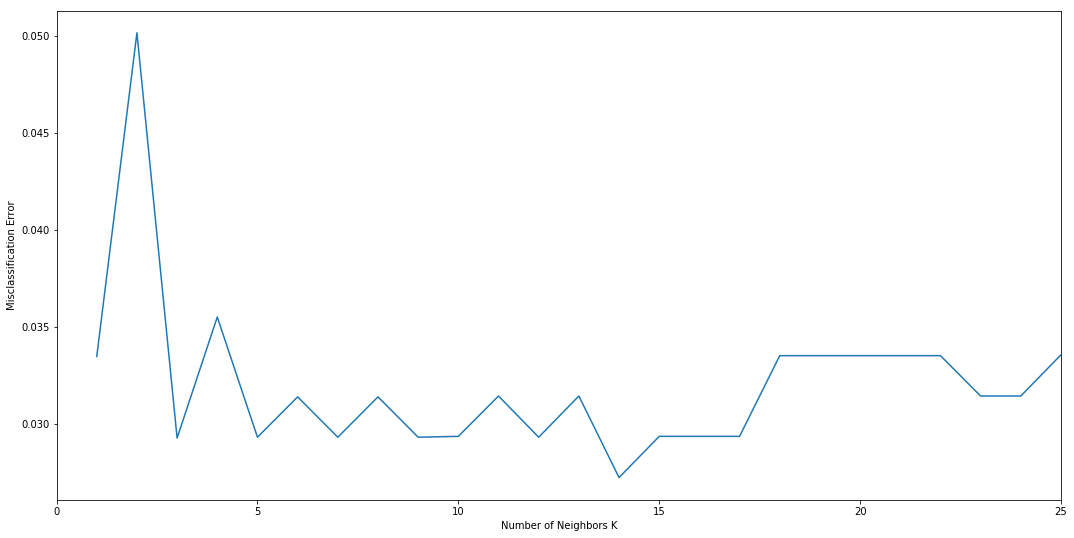

In [60]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()